# Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing double
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA

In [4]:
data.shape

(42, 2)

<Axes: >

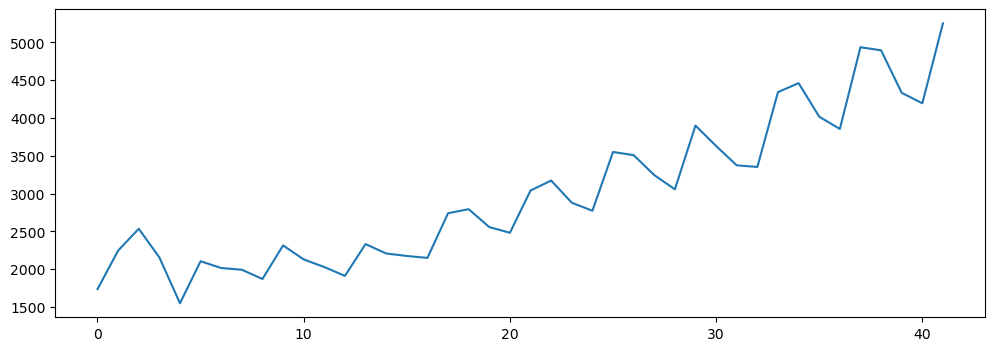

In [5]:
plt.figure(figsize=(12,4))
data.Sales.plot()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
data[data.duplicated()]

,Quarter,Sales


In [9]:
quarter=['Q1','Q2','Q3','Q4']
n=data['Quarter'][0]
n[0:2]

data['quarter']=0

In [10]:
for i in range(42):
    n=data['Quarter'][i]
    data['quarter'][i]=n[0:2]

In [11]:
dummy=pd.DataFrame(pd.get_dummies(data['quarter']))
data

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [13]:
pd.crosstab(index=data["Sales"],columns=data["quarter"])

quarter,Q1,Q2,Q3,Q4
Sales,,,,
1547.818996,1,0,0,0
1734.827000,1,0,0,0
1869.049999,1,0,0,0
1910.603996,1,0,0,0
1991.746998,0,0,0,1
2014.362999,0,0,1,0
2026.828999,0,0,0,1
2104.411995,0,1,0,0
2128.320000,0,0,1,0


<Axes: xlabel='quarter', ylabel='Sales'>

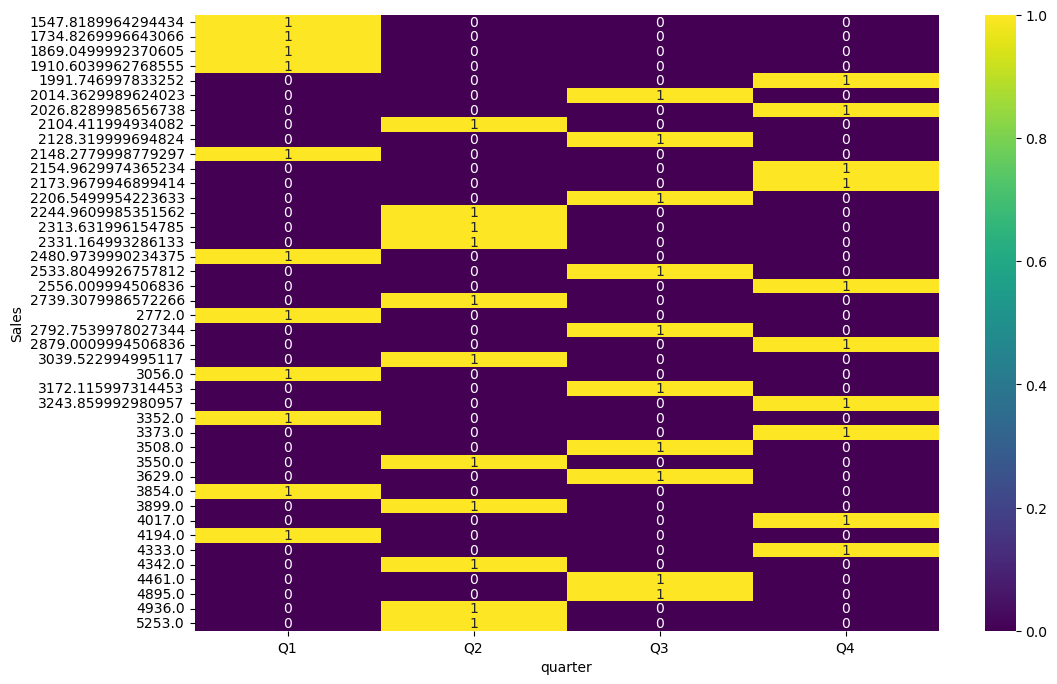

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(index=data["Sales"],columns=data["quarter"]),annot=True,cmap="viridis")

<Axes: xlabel='quarter', ylabel='Sales'>

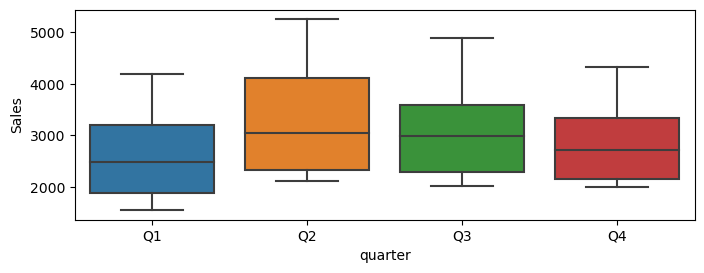

In [15]:
# Boxplot

plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=data)

# Splitting data

In [17]:
Train = data.head(37)
Test = data.tail(5)

# Moving Average

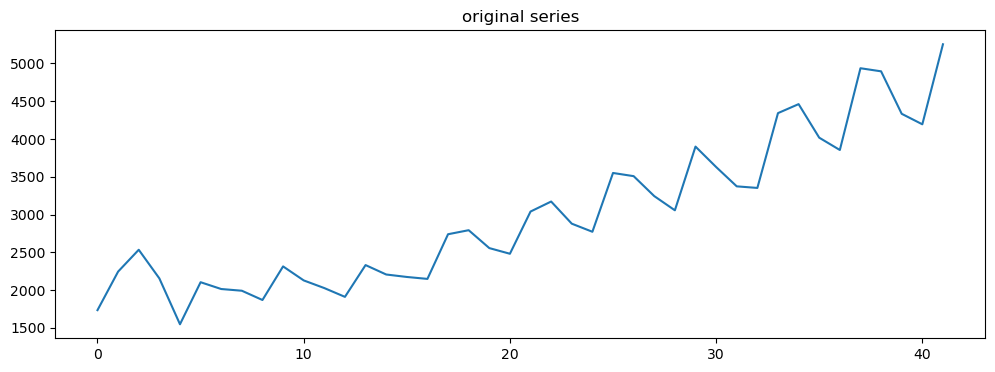

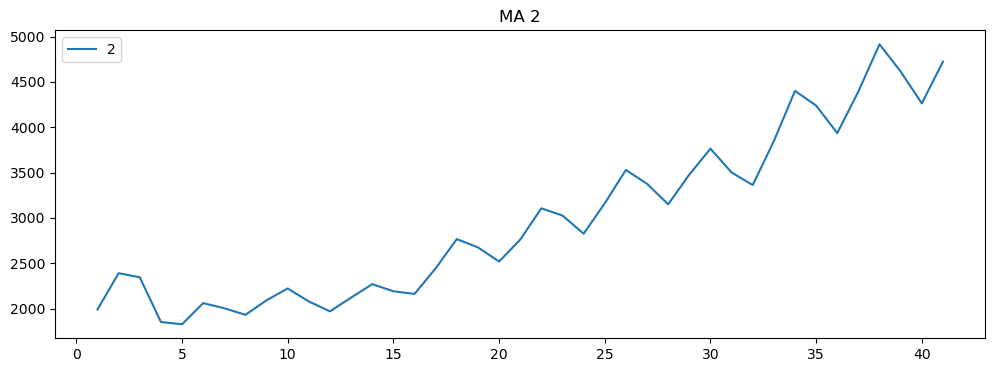

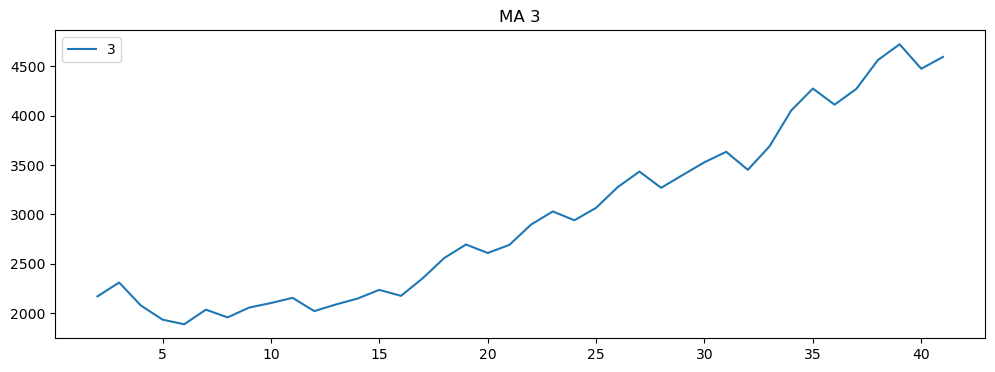

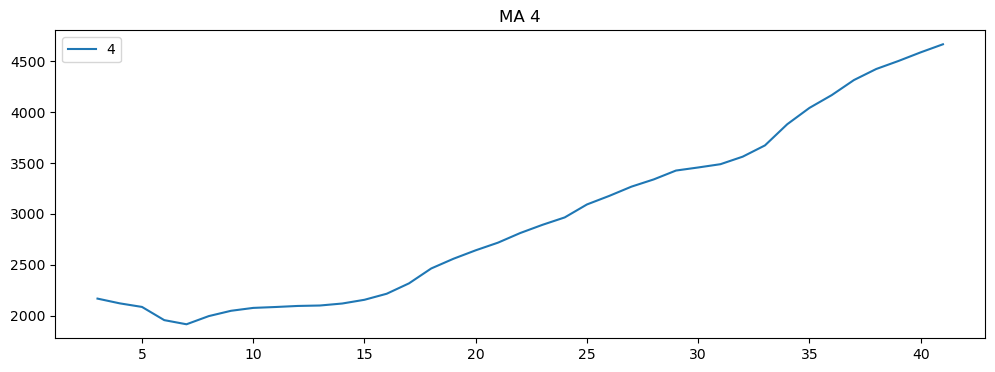

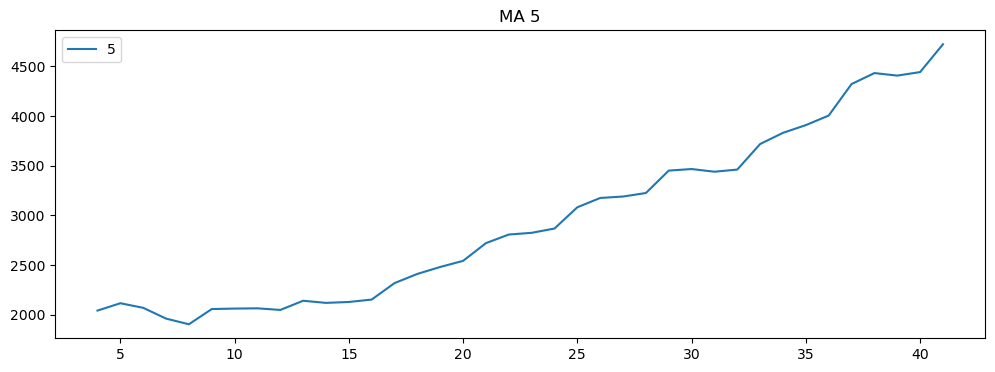

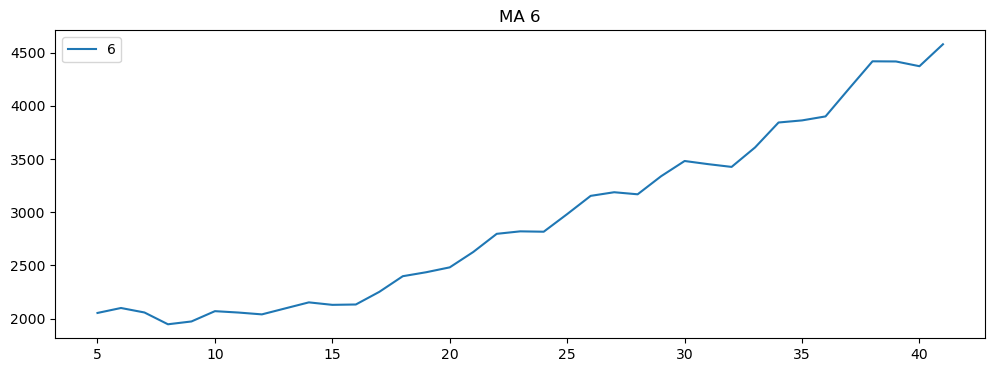

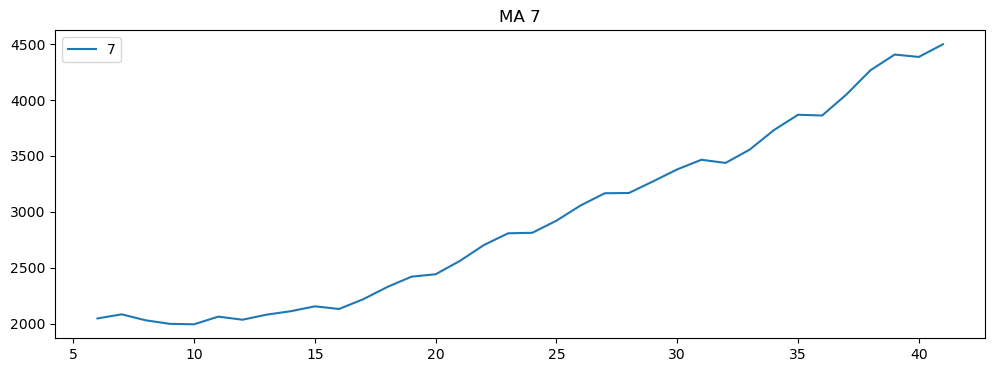

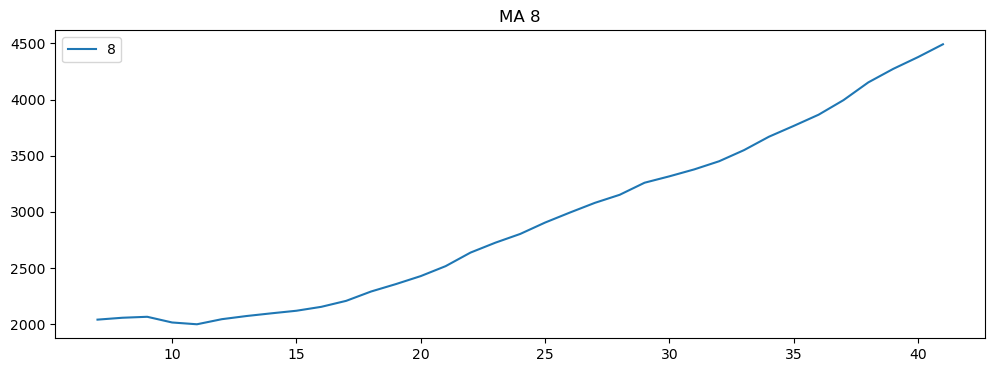

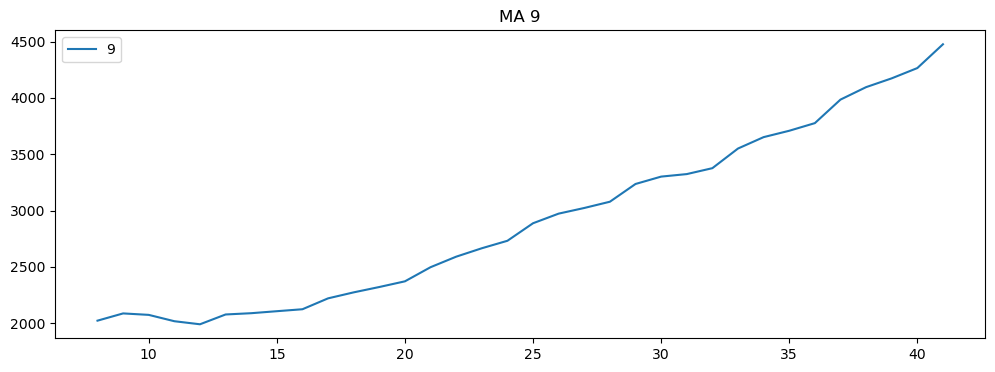

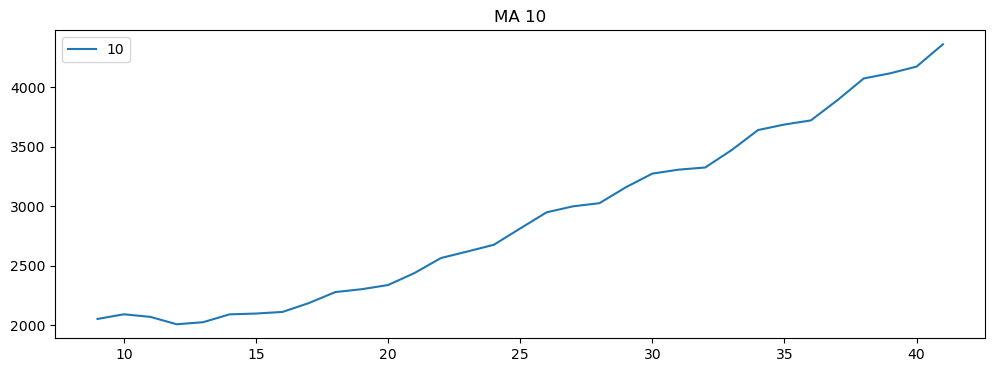

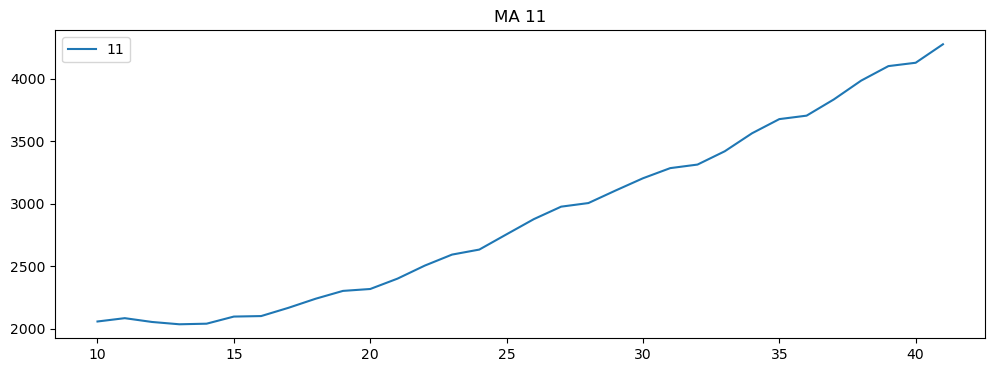

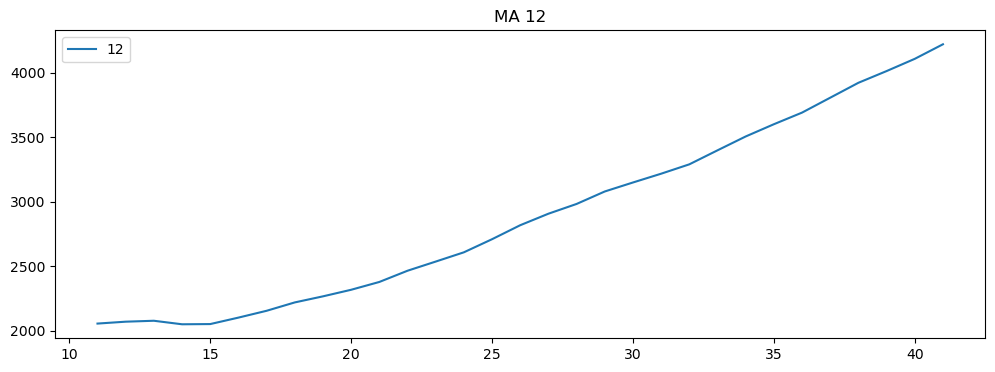

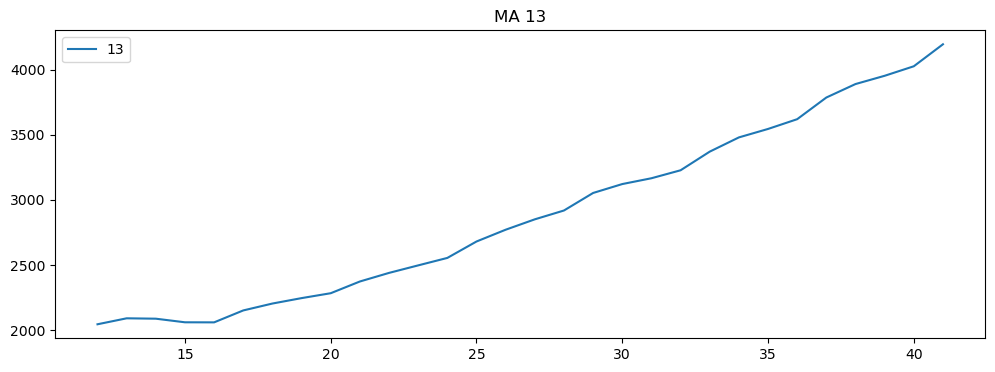

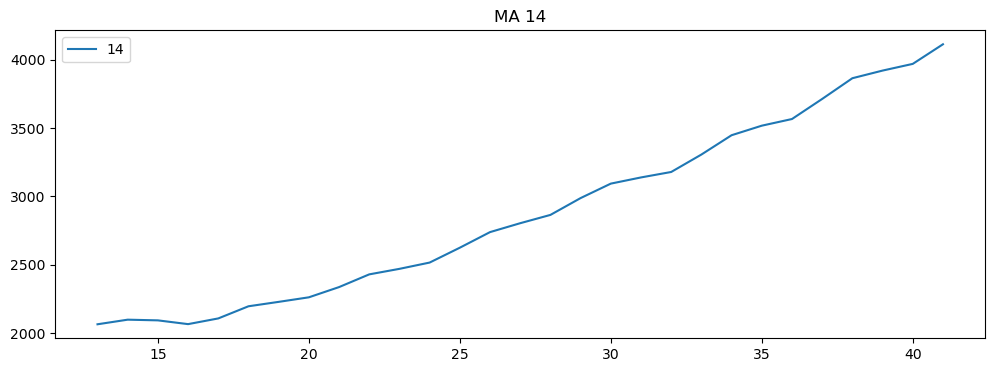

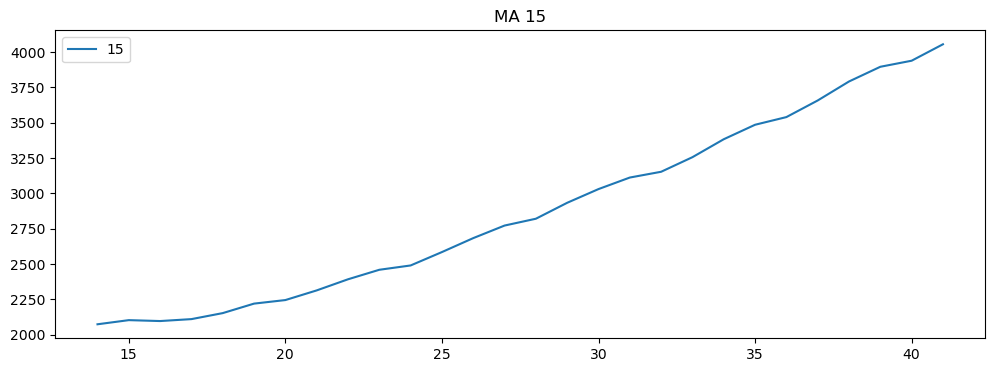

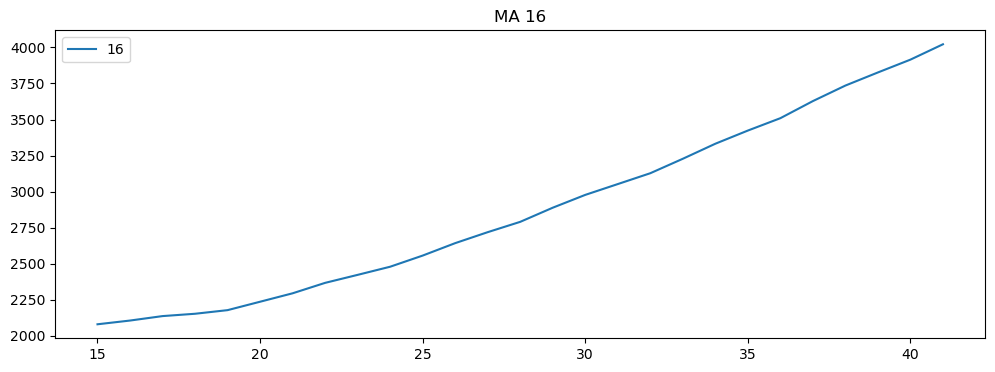

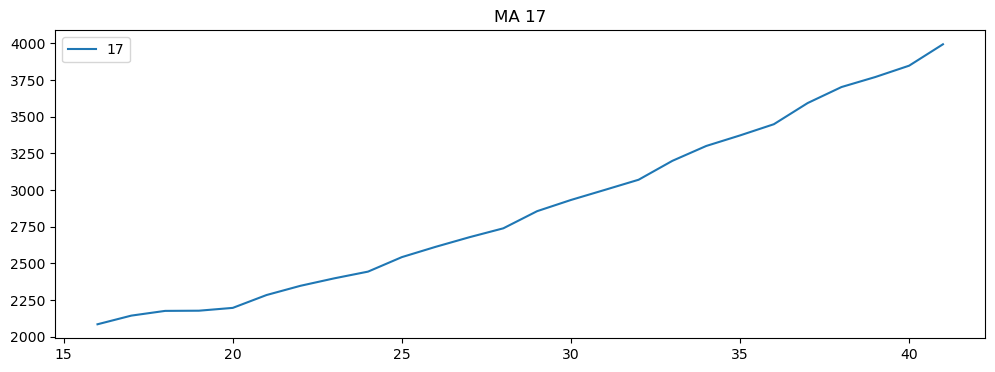

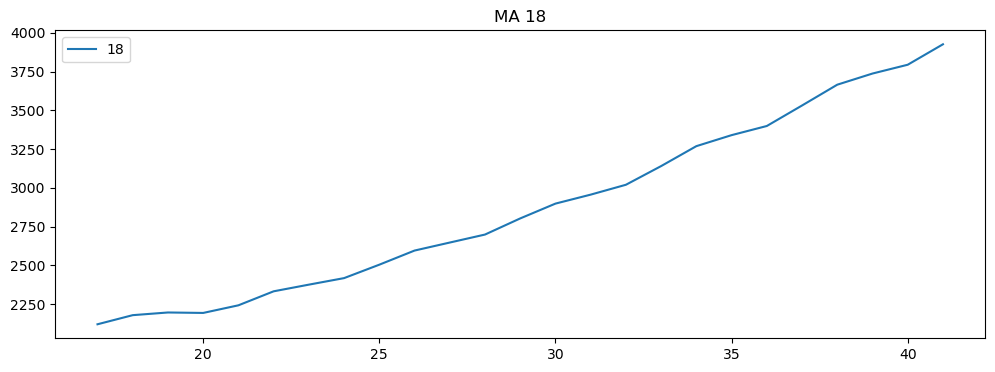

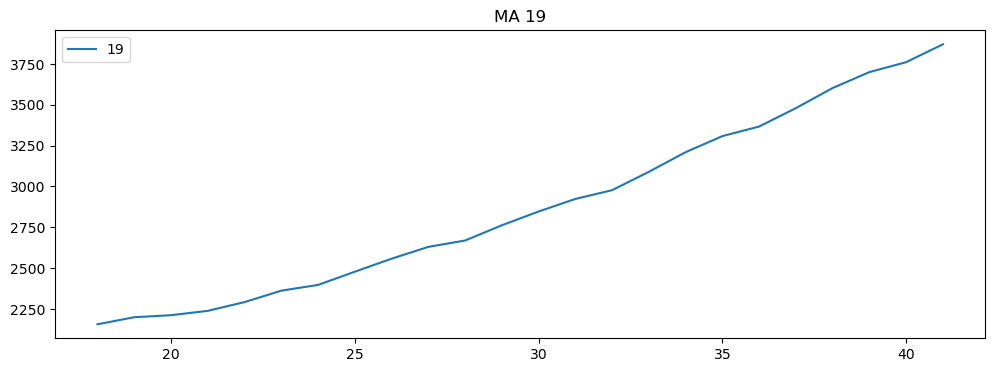

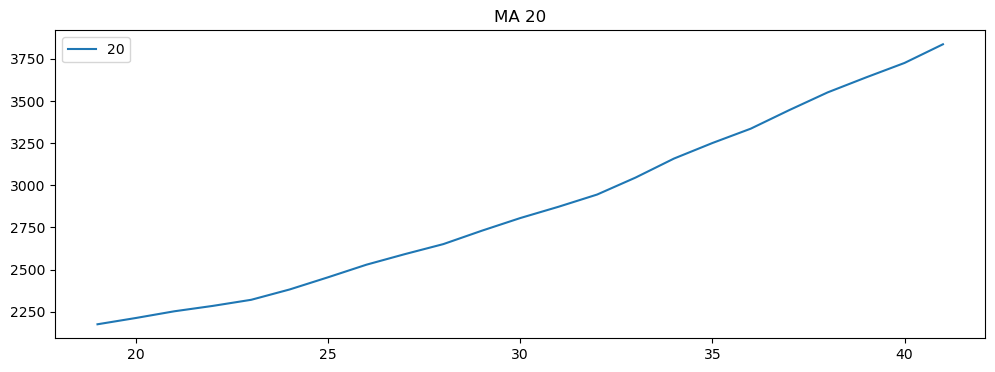

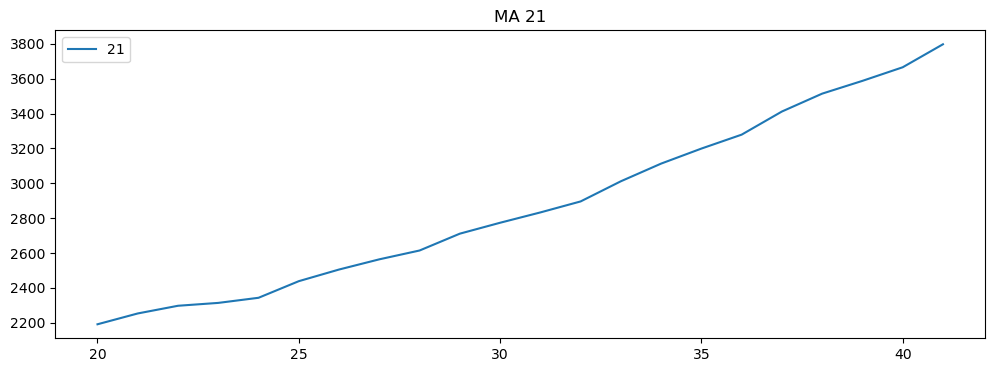

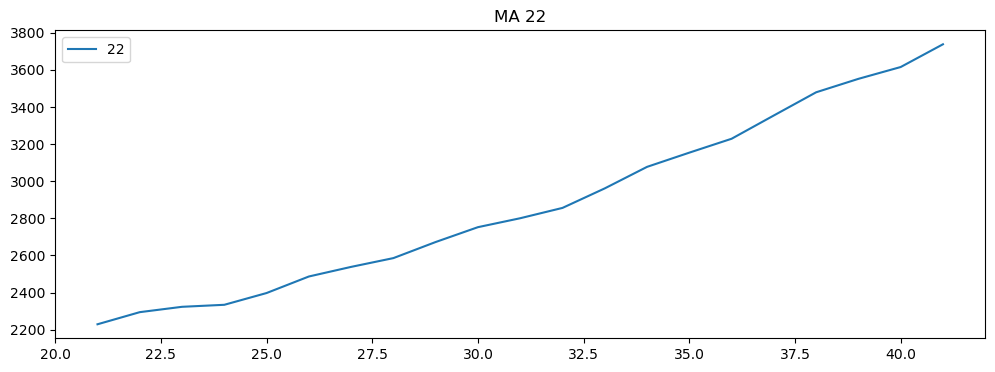

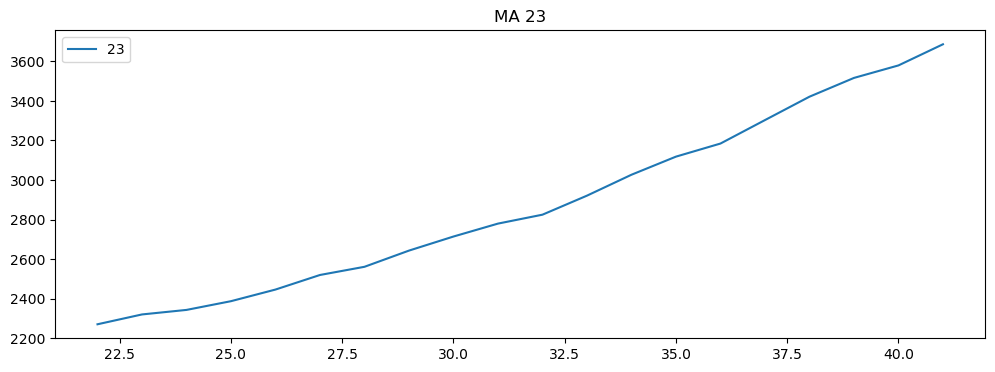

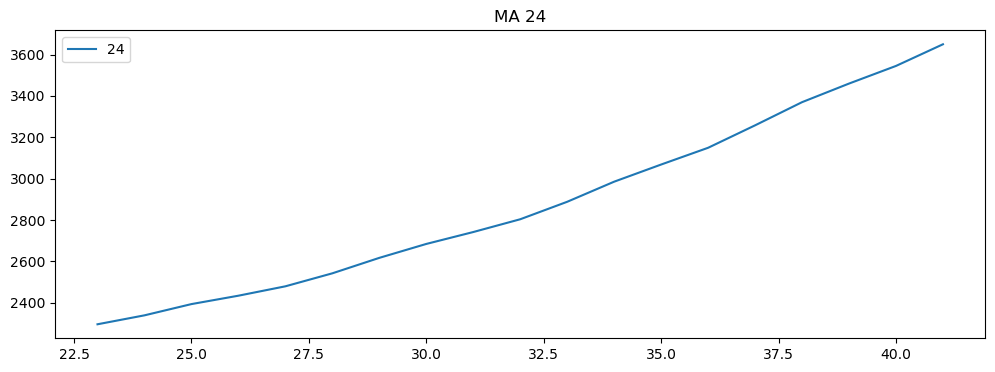

In [18]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot

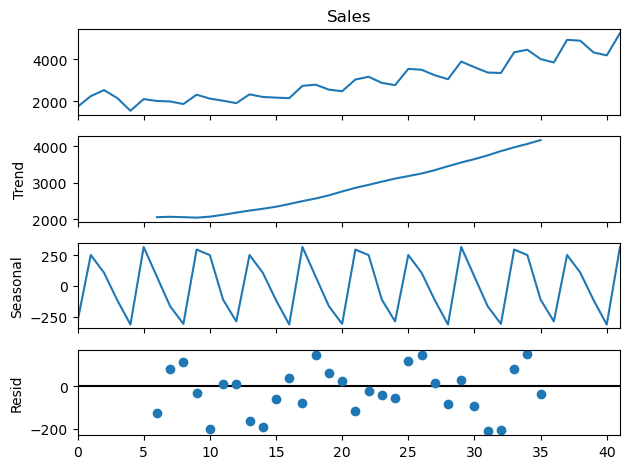

In [19]:
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# Evaluation Metric MAPE

In [20]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [30]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.5)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE_ses=MAPE(Test.Sales,pred_ses)
MAPE_ses

15.243139749346337

# Double Exponential Method

In [31]:
de_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_de = de_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE_de=MAPE(pred_de,Test.Sales)
MAPE_de

17.527156627077954

# Holts winter exponential smoothing with additive seasonality and additive trend

In [33]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE_hw=MAPE(pred_hwe_add_add,Test.Sales)
MAPE_hw

4.281736721015807

# Final Model by combining train and test

In [38]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()

In [39]:
data = {"MODEL":pd.Series(["MAPE_ses","MAPE_de","MAPE_hw"]),"MAPE_Values":pd.Series([MAPE_ses,MAPE_de,MAPE_hw])}
table_MAPE=pd.DataFrame(data)
table_MAPE.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
2,MAPE_hw,4.281737
0,MAPE_ses,15.243140
1,MAPE_de,17.527157


In [40]:
#Forecasting for next 10 time periods

hwe_model_add_add.forecast(10)

37    4641.255731
38    4629.735280
39    4415.410992
40    4338.944492
41    5045.063631
42    5033.543180
43    4819.218892
44    4742.752392
45    5448.871530
46    5437.351080
dtype: float64